UFRGS - Universidade Federal do Rio Grande do Sul   
PPGEC - Programa de Pós-Graduação em Engenharia Civil   
PEC00025 - Introdução à Teoria de Vibrações

    00312165 – DÉBORA DALA MARIA VIZIOLI 

### Trabalho 1 - Sistema de vibração com um grau de liberdade

[1.   Introdução](#section_1)  
[2.   Coleta de informações](#section_2)  
[3.   Deslocamento - Método de Duhamel](#section_3)  
[4.   Espectro](#section_4)  
[5.   Periodograma](#section_5)  
[6.   Conclusões](#section_6)  
    
 
 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#importar os módulos necessários
from MRPy import MRPy

## 1. Introdução <a name="section_1"></a> 

O presente trabalho tem como objetivo a utilização do programa Phyton na obtenção de gráficos que expressam a vibração analisada. Fazendo uso de um celular através do aplicativo iNVH - Bosch que funciona como um acelerômetro, realizou-se a medição da excitação de outro celular ao receber uma ligação no interior de um armário. Para esse caso, buscou-se realizar o cálculo do deslocamento fazendo uso do método de Duhamel, a plotagem do espectro de pseudoaceleração, bem como de um periodograma. Abaixo são indicadas as características adotadas:


In [6]:
Tn = np.linspace (0.1,20,2000) #período da excitação
#linspace (limite inicial do intervalo, limite final do intervalo, 
#nº de pontos que o intervalo deve conter/comprimento do arranjo resultante)
m  = 3.0       #massa do sistema 
fn = 1/Tn       #frequência natural
zt = 0.01      #amortecimento
u0 = 0.0        #deslocamento inicial
v0 = 0.0       #velocidade inicial

## 2. Coleta de informações <a name="section_2"></a> 


A vibração provocada no armário por um celular tocando ao receber uma chamada foi medida pelo aplicativo iNVH - Bosch. O mesmo gerou um arquivo de excel no formato ".csv" que foi inserido no programa pela classe MRPy de propriedade do Prof. Marcelo Maia Rocha.


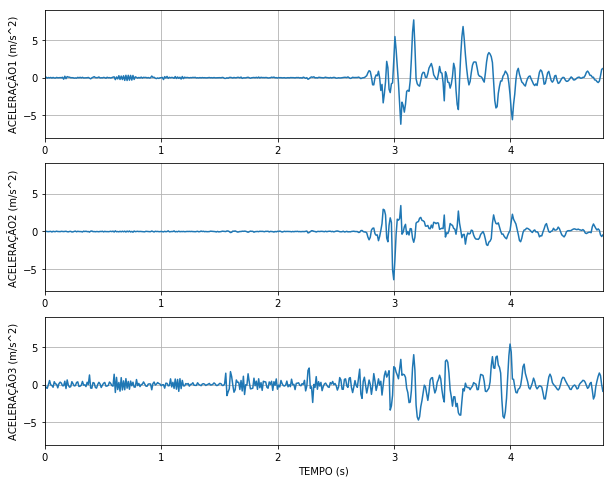

In [7]:
data = MRPy.from_file('data/iNVH001', form='invh').zero_mean()
t    = data.t_axis()

plt.figure(1, figsize=(10, 8), clear=True)
#figsize(largura e altura da figura em polegadas)

for kX, acc in enumerate(data):
#enumerate (qualquer objeto que suporte iteração)
#o valor do índice a partir do qual o contador é para ser iniciado é 0, por padrão, não precisando ser colocado 

    plt.subplot(3, 1 ,kX+1)
    plt.plot(t, acc)

    plt.xlim(0, data.Td);   
    plt.ylim(-8, 9);
    plt.ylabel('ACELERAÇÃO{0} (m/s^2)'.format(kX+1)) 

    plt.grid(True) 

plt.xlabel('TEMPO (s)');

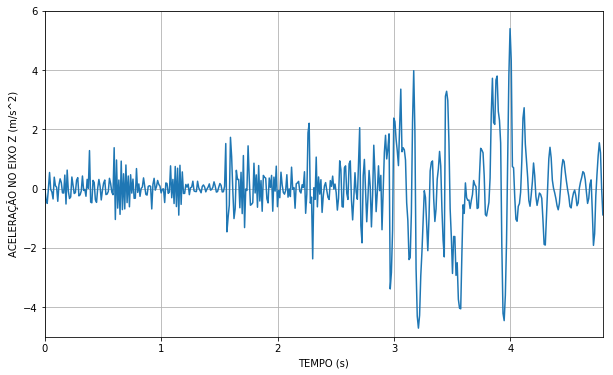

In [10]:
az = MRPy(data[2], data.fs)  
t  = az.t_axis()

plt.figure(4, figsize=(10, 6), clear=True)
plt.plot(t, az[0])
#az[0] é o 1, pois começa contar de 0.

plt.xlim(0, az.Td);  plt.xlabel('TEMPO (s)') 
plt.ylim(-5, 6);   plt.ylabel('ACELERAÇÃO NO EIXO Z (m/s^2)') 

plt.grid(True) 

## 3. Deslocamento - Método de Duhamel <a name="section_3"></a> 


O método de Duhamel é utilizado para vibrações forçadas em um sistema amortecido, podendo ser encontrado através da seguinte fórmula:

$$ u(t) = u_0(t) + \frac{1}{m \omega_{\rm D}} 
                   \int_0^t \exp \left[ -\zeta\omega_{\rm n}(t - \tau) \right] \;
                   \sin \omega_{\rm D} (t - \tau) \; F(\tau) \; d\tau $$

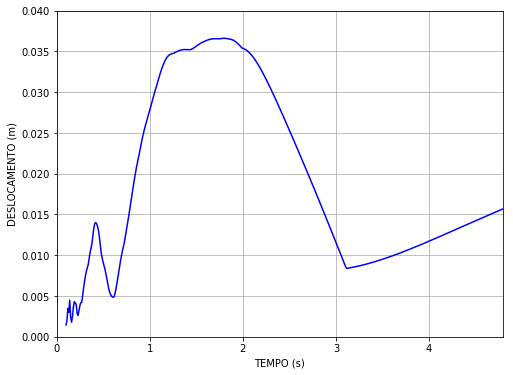

In [11]:
umaximo = np.zeros(fn.shape)
#vetor com tamanho de fn

for k, f in enumerate(fn):
#enumerate (qualquer objeto que suporte iteração)
#o valor do índice a partir do qual o contador é para ser iniciado é 0, por padrão, não precisando ser colocado 

    u_DH = az.sdof_Duhamel(f, zt, u0, v0)/m
    umaximo[k] = u_DH.max()

plt.figure(5, figsize=(8, 6), clear=True)
plt.plot(Tn, umaximo, 'b')

plt.xlim(0, az.Td);        plt.xlabel('TEMPO (s)') 
plt.ylim(0, 0.04);   plt.ylabel('DESLOCAMENTO (m)') 

plt.grid(True) 

## 4. Espectro <a name="section_4"></a> 



Com gráfico de aceleração pelo período é possível descobrir a aceleração de pico máxima, essa grandeza é encontrada através da seguinte fórmula:

$$ a_p = \omega_{\rm n}{\rm ^2}* umax $$




A aceleração de pico máxima é 9.587908010118273


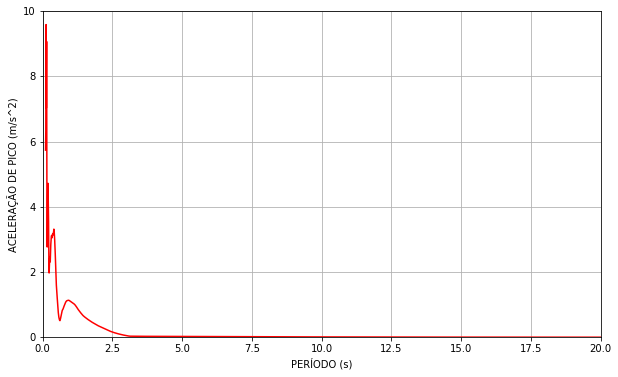

In [13]:
Wn=(2*np.pi*fn)**2
aceleracaopico = umaximo*Wn

plt.figure(6, figsize=(10, 6), clear=True)
plt.plot(Tn, aceleracaopico, 'r')

plt.xlim(0, Tn [-1]);        plt.xlabel('PERÍODO (s)') 
plt.ylim(-0, 10);   plt.ylabel('ACELERAÇÃO DE PICO (m/s^2)') 
print('A aceleração de pico máxima é', max(aceleracaopico))

plt.grid(True)

## 5. Periodograma <a name="section_4"></a> 

Através do periodograma é possível ter um valor aproximado da frequência natural do caso analisado. 

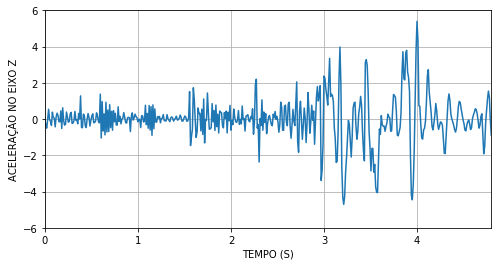

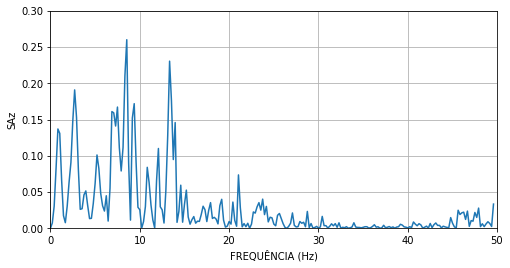

In [15]:
plt.figure(7, figsize=(8, 4), clear=True)
plt.plot(t, az[0])

plt.xlim(0,az.Td); plt.xlabel('TEMPO (S)')
plt.ylim(-6, 6); plt.ylabel('ACELERAÇÃO NO EIXO Z')

plt.grid(True)

Saz, fs = az.periodogram()
f = az.f_axis()

plt.figure(8, figsize=(8, 4), clear=True)
plt.plot(f, Saz[0])

plt.xlim(0, 50); plt.xlabel('FREQUÊNCIA (Hz)')
plt.ylim(0.0, 0.3); plt.ylabel('SAz')

plt.grid(True)

Da mesma maneira, fez-se o periodograma com a saída de dados.

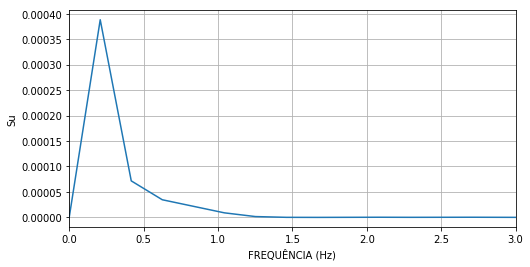

In [24]:
Su_DH, fs = u_DH.periodogram()
f = u_DH.f_axis()

plt.figure(9, figsize=(8, 4), clear=True)
plt.plot(f, Su_DH[0])

plt.xlim(0, 3); plt.xlabel('FREQUÊNCIA (Hz)')
plt.ylabel('Su')

plt.grid(True)

## 6. Conclusões <a name="section_4"></a> 


Com base na vibração na direção vertical obtida com o aplicativo através da excitação causada pelo celular no armário, pode-se resolver o sistema através de um grau de liberdade. Como resposta, encontrou-se os deslocamentos contidos entre 0.1Hz e 20Hz para 2000 pontos de frequência natural e multiplicando o deslocamento máximo por $ \omega_{\rm n}$ ao quadrado, passou-se a conhecer a aceleração de pico. Além desses, obteve-se também a frequência natural que é próxima de 8Hz.